# Herleitung der HTM für Standardmanipulatoren mittels DH-Methode

## (1) Polar-Geometrie

Folgende Bibliotheken, Funktionen und Konstanten werden genutzt:

In [48]:
from matplotlib import pyplot as plt
from numpy.linalg import inv
from IPython import display
import numpy as np
import math

PI = 3.1415926535

def plot4x4Mat(m):
    print("[%6.2f\t%6.2f\t%6.2f\t%6.2f]"%(m[0,0],m[0,1],m[0,2],m[0,3]))
    print("[%6.2f\t%6.2f\t%6.2f\t%6.2f]"%(m[1,0],m[1,1],m[1,2],m[1,3]))
    print("[%6.2f\t%6.2f\t%6.2f\t%6.2f]"%(m[2,0],m[2,1],m[2,2],m[2,3]))
    print("[%6.2f\t%6.2f\t%6.2f\t%6.2f]"%(m[3,0],m[3,1],m[3,2],m[3,3]))
    
def DH4x4(Theta,Alpha,a,d):
    H = np.array([[1,0,0,0],[0,1,0,0],[0,0,1,0],[0,0,0,1]],np.float32);    
    
    H[0,0] =  np.cos(Theta);
    H[0,1] = -np.sin(Theta)*np.cos(Alpha);
    H[0,2] =  np.sin(Theta)*np.sin(Alpha);
    H[0,3] = a*np.cos(Theta);
    
    H[1,0] = np.sin(Theta);
    H[1,1] = np.cos(Theta)*np.cos(Alpha);
    H[1,2] = -np.cos(Theta)*np.sin(Alpha);
    H[1,3] = a*np.sin(Theta);
    
    H[2,0] = 0;
    H[2,1] = np.sin(Alpha);
    H[2,2] = np.cos(Alpha);
    H[2,3] = d;
    
    return H;

### (I) Kinematisches Model des Roboters

#### (I.1) Kinematische Struktur und Parameter

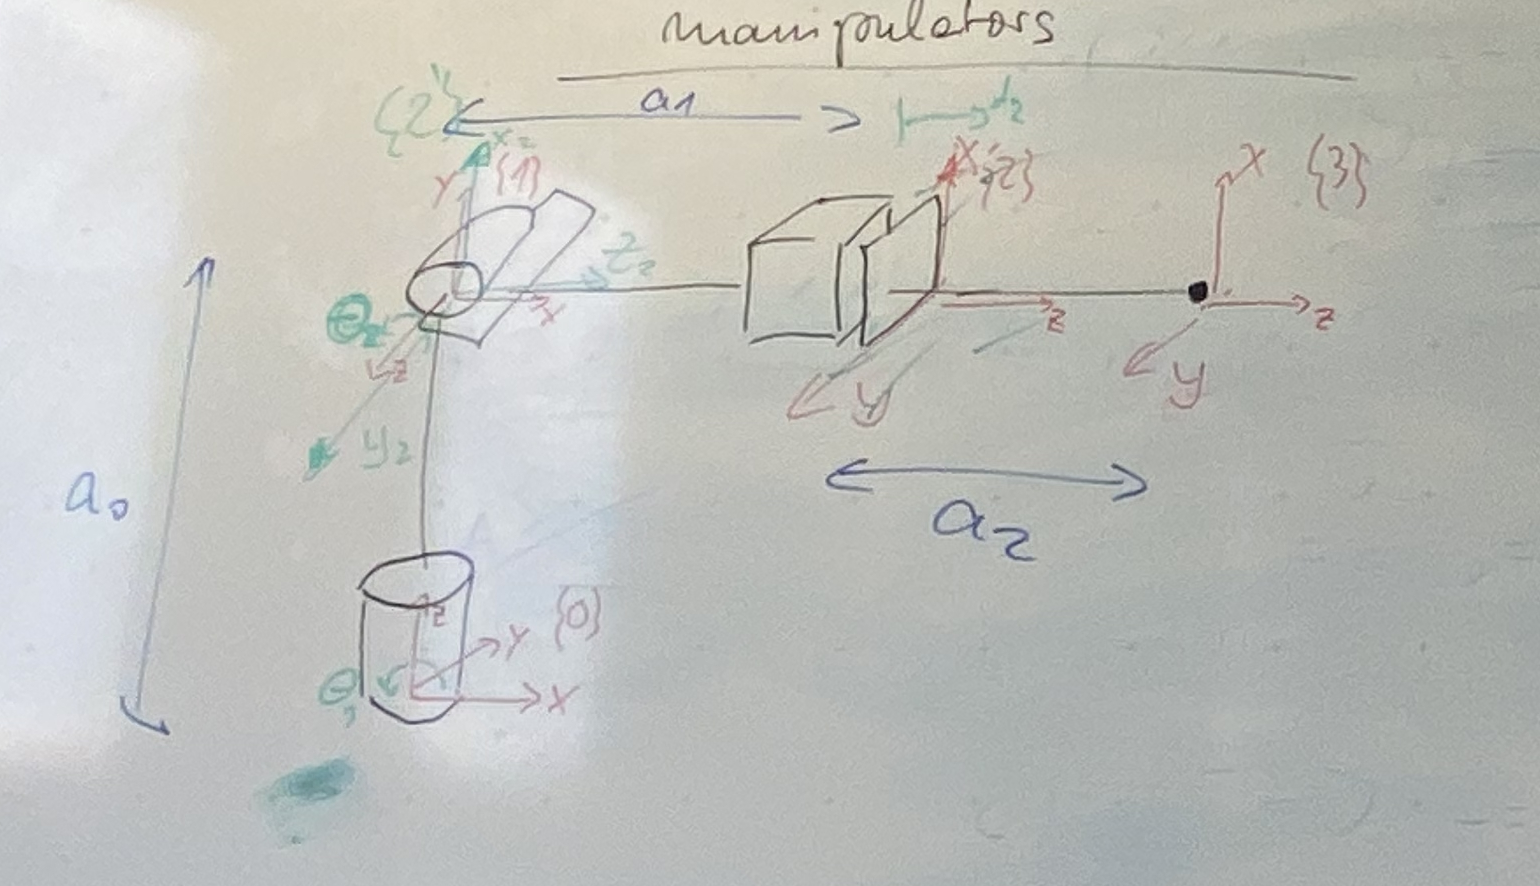

In [76]:
a0 = 1
a1 = 1
a2 = 1
Theta_1 = PI/3
Theta_2 = PI/3
d2   = 2

In [77]:
## Ausgabe der Ergebnisse
print("a0 = ",end=""); print(a0)
print("a1 = ",end=""); print(a1)
print("a2 = ",end=""); print(a2)
print("Theta_1 = ",end=""); print(Theta_1)
print("Theta_2 = ",end=""); print(Theta_2)
print("d2 = ",end=""); print(d2)

a0 = 1
a1 = 1
a2 = 1
Theta_1 = 1.0471975511666667
Theta_2 = 1.0471975511666667
d2 = 2


### (II) Herleitung der HTM mittels DH-Parameter

Die DH-Parameter Tabelle für die gegebene Kinematische Struktur hat vier Spalten und 3 Zeilen, startend mit Nummer 1 für die Variable $n$.

 $$   
    \begin{array}{c || c|c|c|c}       
       n & \Phi_n &  \mathrm{A}_n &  a_n & d_n \\ 
        \hline
      1 & \Theta_1  & \frac{\pi}{2}   & 0  & a_0 \\
      2 & \Theta_2 + \frac{\pi}{2}  & \frac{\pi}{2} & 0  & 0 \\       
      3 & 0  & 0  & 0   & (a_1 + a_2 + d_2) \\
    \end{array}
 $$

#### (II.1) HTM $^{0}_{1}T$

In [78]:
DH_Theta = Theta_1
DH_Alpha = 0.5*PI
DH_a = 0
DH_d = a0
T_1_0 = DH4x4(DH_Theta, DH_Alpha, DH_a, DH_d)
plot4x4Mat(T_1_0)
DH_Alpha

[  0.50	 -0.00	  0.87	  0.00]
[  0.87	  0.00	 -0.50	  0.00]
[  0.00	  1.00	  0.00	  1.00]
[  0.00	  0.00	  0.00	  1.00]


1.57079632675

#### (II.2) HTM $^{1}_{2}T$

In [79]:
DH_Theta = Theta_2 + 0.5*PI
DH_Alpha = 0.5*PI
DH_a = 0
DH_d = 0
T_2_1 = DH4x4(DH_Theta, DH_Alpha, DH_a, DH_d)
plot4x4Mat(T_2_1)

[ -0.87	 -0.00	  0.50	 -0.00]
[  0.50	 -0.00	  0.87	  0.00]
[  0.00	  1.00	  0.00	  0.00]
[  0.00	  0.00	  0.00	  1.00]


#### (II.3) HTM $^{2}_{3}T$

In [80]:
DH_Theta = 0
DH_Alpha = 0
DH_a = 0
DH_d = a1+a2+d2
T_3_2 = DH4x4(DH_Theta, DH_Alpha, DH_a, DH_d)
plot4x4Mat(T_3_2)

[  1.00	 -0.00	  0.00	  0.00]
[  0.00	  1.00	 -0.00	  0.00]
[  0.00	  0.00	  1.00	  4.00]
[  0.00	  0.00	  0.00	  1.00]


#### (II.4) Die finale HTM $^{0}_{3}T$

In [81]:
T_1_0
T_2_0 = T_1_0 @ T_2_1
T_3_0 = T_1_0 @ T_2_1 @ T_3_2
plot4x4Mat(T_3_0)

[ -0.43	  0.87	  0.25	  1.00]
[ -0.75	 -0.50	  0.43	  1.73]
[  0.50	  0.00	  0.87	  4.46]
[  0.00	  0.00	  0.00	  1.00]


### (III) Übung

In [82]:
x = np.array([0,0,T_1_0[0,3],T_2_0[0,3],T_3_0[0,3]],np.float32)
y = np.array([0,0,T_1_0[1,3],T_2_0[1,3],T_3_0[1,3]],np.float32)
z = np.array([0,a0,T_1_0[2,3],T_2_0[2,3],T_3_0[2,3]],np.float32)

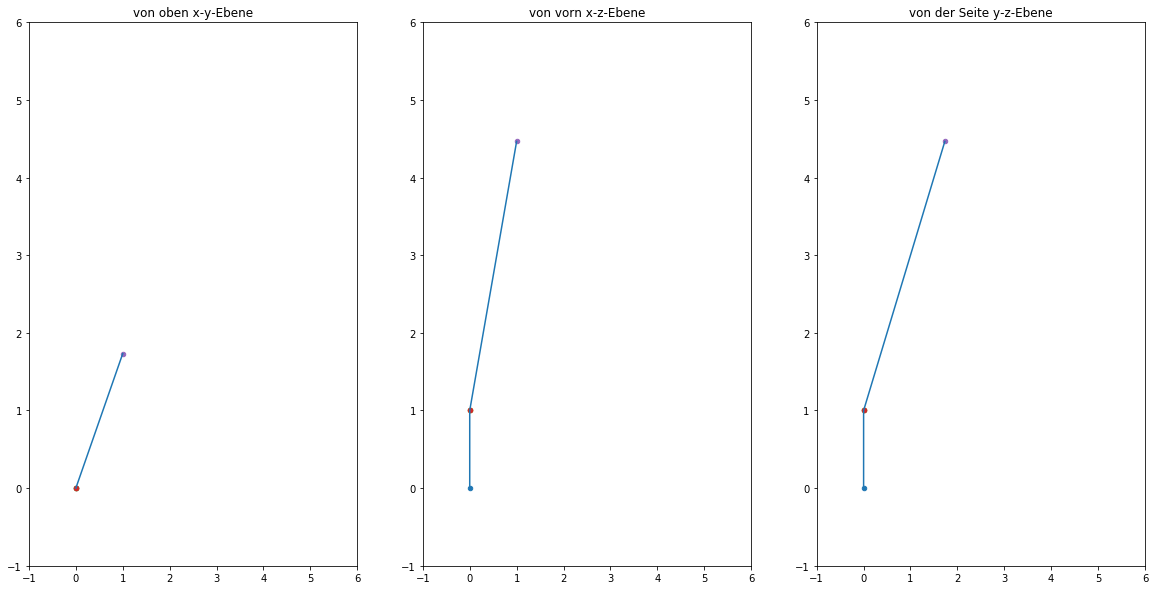

In [83]:
plt.subplots(1,3,figsize=(20,10))

plt.subplot(1,3,1)
plt.xlim(-1, 6)
plt.ylim(-1, 6)
plt.title("von oben x-y-Ebene")
plt.scatter(  x[0] ,y[0], s = 20 )
plt.scatter(  x[1], y[1], s = 20 )
plt.scatter(  x[2], y[2], s = 20 )
plt.scatter(  x[3], y[3], s = 20 )
plt.scatter(  x[4], y[4], s = 20 )
plt.plot(x,y);

plt.subplot(1,3,2)
plt.xlim(-1, 6)
plt.ylim(-1, 6)


plt.title("von vorn x-z-Ebene")
plt.scatter(  x[0] ,z[0], s = 20 )
plt.scatter(  x[1], z[1], s = 20 )
plt.scatter(  x[2], z[2], s = 20 )
plt.scatter(  x[3], z[3], s = 20 )
plt.scatter(  x[4], z[4], s = 20 )
plt.plot(x,z);

plt.subplot(1,3,3)
plt.xlim(-1, 6)
plt.ylim(-1, 6)
plt.title("von der Seite y-z-Ebene")
plt.scatter(  y[0] ,z[0], s = 20 )
plt.scatter(  y[1], z[1], s = 20 )
plt.scatter(  y[2], z[2], s = 20 )
plt.scatter(  y[3], z[3], s = 20 )
plt.scatter(  y[4], z[4], s = 20 )


plt.plot(y,z);

Text(0.5, 0, 'Z Label')

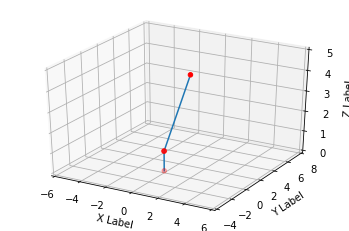

In [84]:
from mpl_toolkits.mplot3d import Axes3D

# Creating a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim(-6, 6)
ax.set_ylim(-4, 8)
ax.set_zlim(0, 5)
ax.scatter(x, y, z, c='r', marker='o')
ax.plot(x,y,z);
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

